https://github.com/mwritescode/slither-audited-smart-contracts

The bytecode was downloaded using the Web3.py library, in particular the web3.eth.getCode()

Solidity Smart Contracts that have been verified on Etherscan.io

classification of vulnerabilities

both binary and multilabel text

este trabajo: text classification

evaluated based on the accuracy

nota personal no poner en ppt: source codes are in Solidity

label: cleaned up version or a multi-label version

data fields: address, source_code, bytecode, slither
nota personal: una fila tardaba en compilar sta 
nota personal no poner en ppt: train, test and validation splits are only provided for those configurations that do not include "all-" in their names
nota personal no poner en ppt: a pesar de 4 columnas el tiempo de compilación era considerable. OpenAI mencionó que ven if the DataFrame has only four rows, if the data within those rows is complex, such as having many columns, long strings or complex object types, then it can take longer to execute commands on that data.

address: texto que representa la dirección del smart contract lanzada a la red Ethereum
source code: una versión simplificada de la codebase? del smart contract en Solidity
bytecode: texto que representa el bytecode del contrato
slither: resultado limpio con lista de etiquetas

la base de datos tiene sourcecode y bytecode de Solidity Smart Contracts verificados por Etherscan.io con una clasificación para sus vulnerabilidades

La base de datos fue utilizada para entrenar un modelo de clasificación de texto binaria. Se evaluó precisión de las etiquetas predecidas

lista de smart contracts verificados por Smart Contract Sanctuary o via Etherscan

flattned using Slither contract flattener

Ethereum: decentralized smart contracts platform.

A "smart contract" is simply a program that runs on the Ethereum blockchain. It's a collection of code (its functions) and data (its state) that resides at a specific address on the Ethereum blockchain.

Smart contracts are a type of Ethereum account. This means they have a balance and can be the target of transactions. However they're not controlled by a user, instead they are deployed to the network and run as programmed. User accounts can then interact with a smart contract by submitting transactions that execute a function defined on the smart contract. Smart contracts can define rules, like a regular contract, and automatically enforce them via the code. Smart contracts cannot be deleted by default, and interactions with them are irreversible.

Minimizes huyman factor, automatic execution, public records
- 

In [1]:
#!pip install web3
!pip install datasets
#!pip install numpy==1.19.5
!pip install hexbytes
import numpy as np
import pandas as pd
import re
import seaborn as sns
from hexbytes import HexBytes
import matplotlib.pyplot as plt
from datasets import load_dataset
import sys
sys.path.append('MCD_DL_proyecto2')
#import funciones
import re

/Users/1thaliaespana1/opt/anaconda3/envs/itam/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#extraido de Git repo mwritescode/slither-audited-smart-contracts

train_set_original = load_dataset("mwritescode/slither-audited-smart-contracts", 'big-multilabel', split='train',verification_mode='no_checks') #verification_mode=no_checks
test_set_original = load_dataset("mwritescode/slither-audited-smart-contracts", 'big-multilabel', split='test',verification_mode='no_checks')
#val_set_original = load_dataset("mwritescode/slither-audited-smart-contracts", 'big-multilabel', split='validation',verification_mode='no_checks')

Found cached dataset slither-audited-smart-contracts (/Users/1thaliaespana1/.cache/huggingface/datasets/mwritescode___slither-audited-smart-contracts/big-multilabel/1.1.0/4cf503b59ce9d3157914e47f6253de773b7ab828f46642685d4b470b88ca1f13)
Found cached dataset slither-audited-smart-contracts (/Users/1thaliaespana1/.cache/huggingface/datasets/mwritescode___slither-audited-smart-contracts/big-multilabel/1.1.0/4cf503b59ce9d3157914e47f6253de773b7ab828f46642685d4b470b88ca1f13)


La base de datos de entrenamiento tiene 79,641 filas × 4 columnas. Sin embargo, la variable objetivo está desbalanceada: sólo 27,036 contratos (34% del total) son seguros en el set de entrenamiento, lo cual podría sesgar el modelo en favor de la población más popular (los contratos no seguros). En el set de prueba y en el set de validación hubieron 5,422 y 3,687 contratos, respectivamente.

Por ello, se recurrió a muestrear una parte proporcional de los contratos no seguros para que la base de datos estuviera balanceada. En otras palabras, se seleccionaron 27,036 contratos no seguros al azar y, junto con la totalidad de los contratos seguros, se conformó una nueva base que será el objeto de estudio.

In [3]:
def balance(df1,n):
    df1=pd.DataFrame(df1)
    df1['slither'] = df1['slither'].apply(lambda x: 4 in x).astype(int) #cambiamos variable objetivo a 1: si hay un contrato seguro, 0 no seguro-hay 4 tipos de no seguro)
    #df1['slither']=pd.DataFrame(target).astype(int) #sustituimos lista original de objetivo por booleano target
    muestra=df1[df1['slither']==0].sample(n, random_state=1000)
    positivo=df1[df1['slither']==1]
    return pd.concat([muestra,positivo])

In [4]:
train_set=balance(train_set_original,27036)
test_set=balance(test_set_original,5422)
#val_set=balance(val_set_original,3687)

In [5]:
import string

def remove_non_alphanumeric(s):
    return s.translate(str.maketrans('', '', string.punctuation))

from datasets.download.streaming_download_manager import xet_parse
def diverse_splits(df):
   x=df.drop('slither',axis=1)
   y=df['slither']
   x_full=x
   x_byte=x.drop('source_code',axis=1)
   x_source=x.drop('bytecode',axis=1)
   return x_full,x_byte,x_source,y

#preparar datos: 
def preparacion(df1):
    df1=pd.DataFrame(df1) #convertimos a data frame
    #df1['slither'] = df1['slither']==4
    #df1['slither'] = df1['slither'].astype(int) #.apply(lambda x: 4 in x) #.astype(int) #cambiamos variable objetivo a 1: si hay un contrato seguro, 0 no seguro-hay 4 tipos de no seguro)
    #TAG_RE = re.compile(r"<(\{\".*?\"|\}\-\_\t\'.*?\')|(/\*.*?\*/|//[^\r\n]*$)>")
    #df1['source_code']=df1['source_code'].apply(lambda x: remove_stopwords(x))
    #df1['source_code'] = df1['source_code'].apply(lambda x: re.sub(TAG_RE,' ',x))
    #df1['bytecode'] = df1['bytecode'].apply(lambda x: re.sub(TAG_RE,' ',x))
    #df1['source_code'] = df1['source_code'].apply(lambda x: lower(x))
    #df1['source_code'] = df1['source_code'].apply(lambda x: strip(x))
    pattern = r'[\n/*;\_\,\|\- \+ \! \' \& \@ \t \<\>\( \{\} \/ \^ \// \[\] \\ \:\="\` \.\)]' 
    df1['source_code']= df1['source_code'].str.replace(pattern, ' ', regex=True)
    return df1

In [6]:
train_set = preparacion(train_set)
test_set = preparacion(test_set)


In [7]:
np.unique(train_set['slither'],return_counts=True)

(array([0, 1]), array([27036, 27036]))

In [8]:
preparacion(train_set).to_parquet("train_DL_preparado.parquet",index=False)
preparacion(test_set).to_parquet("test_DL_preparado.parquet",index=False)
#val_set=preparacion(val_set)
%store train_set
%store test_set

Stored 'train_set' (DataFrame)
Stored 'test_set' (DataFrame)


In [9]:
train_set.shape

(54072, 4)

In [7]:
# Install some dependencies
!pip install -q tensorflow-text  # A dependency of the preprocessing for BERT inputs
!pip install -q tf-models-official # For the AdamW optimizer from tensorflow/models
!pip install bert-for-tf2
!pip install sentencepiece

Se proponen dos modelos de procesamiento de lenguaje natural: BERT y KNN.

Adicionalmente, se proponen tres tipos de bases de datos: una donde sólo contengan información de source_code (versión simplificada de la codebase del smart contract en Solidity), otra donde sólo contengan informacion de bytecode y una tercera donde se incluyan las dos

In [1]:
#!pip install official
# Install some dependencies
#!pip install -q tensorflow-text  # A dependency of the preprocessing for BERT inputs
#!pip install -q tf-models-official # For the AdamW optimizer from tensorflow/models
#!pip install bert-for-tf2
#!pip install sentencepiece
import numpy as np
import pandas as pd
import re

import os
import shutil
import matplotlib.pyplot as plt
#import tensorflow

#import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
#from official.nlp import optimization  # to create AdamW optmizer

%store -r train_set
%store -r test_set


: 

: 

In [3]:
train_ds = train_set
test_ds = test_set

# Download dataset
#train_ds = pd.read_csv("/content/DLfinal_trainset_preparado.csv") #change to train, used it beacuse the database was smaller
#test_ds = pd.read_csv("DLfinal_testset_preparado.csv")
dataset = train_ds

# Set some parameters
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed = 42

In [4]:
# BERT has several sub-models
# Look at https://www.tensorflow.org/tutorials/text/classify_text_with_bert
# or at github repo for different options
tfhub_handle_encoder = "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1"
tfhub_handle_preprocess = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

# Get the embedding BERT layer from the selected model
bert_model = hub.KerasLayer(tfhub_handle_encoder)

# Get the preprocessing BERT layer from the selected model
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

# Use it in a sample text
text_test = ['This is a dummy and boring phrase!']
text_preprocessed = bert_preprocess_model(text_test)

# Use it on a sample text
bert_results = bert_model(text_preprocessed)


# Build Neural Network with BERT
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')

preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
encoder_inputs = preprocessing_layer(text_input)

encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
outputs = encoder(encoder_inputs)

net = outputs['pooled_output']
net = tf.keras.layers.Dropout(0.1)(net)
net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)

classifier_model = tf.keras.Model(text_input, net)
classifier_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

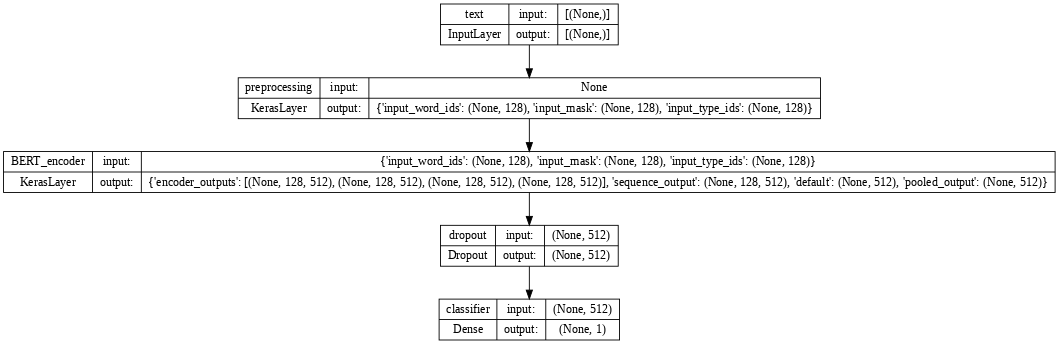

In [5]:
tf.keras.utils.plot_model(classifier_model, show_shapes=True, show_layer_names=True, dpi=64)

In [ ]:
result = tf.data.Dataset.from_tensor_slices(train_ds)

# Custom compilation
epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(result).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

In [ ]:


init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

classifier_model.compile(optimizer=optimizer,
                         loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                         metrics=tf.metrics.BinaryAccuracy())

In [ ]:
# Training
history = classifier_model.fit(x=train_ds, validation_data=test_ds, epochs=epochs)

In [ ]:
# Plot loss
plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Binary accuracy')
plt.plot(history.history['binary_accuracy'], label='Training', linewidth=2)
plt.plot(history.history['val_binary_accuracy'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()
